# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Portfolio/Uber/Data'

In [3]:
import os
import os.path
import pandas as pd

In [4]:
green_cab_June_2015 = pd.read_parquet(os.path.join(data_path, 'green_cab_June_2015.parquet'))
yellow_cab_June_2015 = pd.read_parquet(os.path.join(data_path, 'yellow_cab_June_2015.parquet'))
uber_June_2015 = pd.read_parquet(os.path.join(data_path, 'uber_June_2015.parquet'))
rain_June_2015 = pd.read_parquet(os.path.join(data_path, 'rain_June_2015.parquet'))

# Exploratory Data Analysis (EDA)

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load the lookup table
lookup_table = pd.read_csv(os.path.join(data_path, 'taxi_zone_lookup.csv'))
lookup_table.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [7]:
# Filter the lookup table where Borough is Manhattan
lookup_Manhattan = lookup_table[lookup_table['Borough'] == 'Manhattan']

lookup_table_Manhattan_Location_IDs = lookup_Manhattan['LocationID'].unique()

lookup_table_Manhattan_Location_IDs

array([  4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
        79,  87,  88,  90, 100, 103, 104, 105, 107, 113, 114, 116, 120,
       125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153,
       158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224,
       229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246,
       249, 261, 262, 263])

In [8]:
# Filter Green Cab data where PULocationID matches the Manhattan's LocationID values
green_cab_manhattan = green_cab_June_2015[green_cab_June_2015['PULocationID'].isin(lookup_table_Manhattan_Location_IDs)]
green_cab_manhattan

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
15,1,2015-06-01 00:09:03,2015-06-01 00:14:22,N,1,41,116,2,1.20,6.0,...,1,1.0,None,2015-06-01,6,23,1,0,Monday,0
16,1,2015-06-01 00:15:36,2015-06-01 00:25:20,N,1,116,243,1,2.60,10.0,...,1,1.0,None,2015-06-01,6,23,1,0,Monday,0
30,2,2015-06-01 00:43:22,2015-06-01 00:50:35,N,1,166,116,2,1.92,8.5,...,2,1.0,None,2015-06-01,6,23,1,0,Monday,0
45,1,2015-06-01 00:28:15,2015-06-01 00:30:48,N,5,41,41,1,0.60,0.0,...,2,2.0,None,2015-06-01,6,23,1,0,Monday,0
46,1,2015-06-01 00:34:46,2015-06-01 00:39:08,N,1,42,42,1,1.30,6.0,...,2,1.0,None,2015-06-01,6,23,1,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638858,2,2015-06-30 23:15:37,2015-06-30 23:18:26,N,1,127,128,1,0.49,4.0,...,1,1.0,None,2015-06-30,6,27,30,1,Tuesday,23
1638859,2,2015-06-30 23:46:15,2015-06-30 23:55:35,N,1,244,243,1,1.56,8.5,...,1,1.0,None,2015-06-30,6,27,30,1,Tuesday,23
1638860,2,2015-06-30 23:59:48,2015-07-01 00:26:35,N,1,127,164,1,10.01,28.5,...,1,1.0,None,2015-06-30,6,27,30,1,Tuesday,23
1638861,1,2015-06-30 23:42:03,2015-06-30 23:57:14,N,1,75,186,1,3.80,14.0,...,1,1.0,None,2015-06-30,6,27,30,1,Tuesday,23


In [9]:
# Filter Yellow Cab data where PULocationID matches the Manhattan's LocationID values
yellow_cab_manhattan = yellow_cab_June_2015[yellow_cab_June_2015['PULocationID'].isin(lookup_table_Manhattan_Location_IDs)]
yellow_cab_manhattan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
0,1,2015-06-01 00:04:04,2015-06-01 00:13:02,1,1.10,1,N,79,148,3,...,8.80,None,None,2015-06-01,6,23,1,0,Monday,0
1,1,2015-06-01 00:42:13,2015-06-01 00:52:37,1,3.40,1,N,87,68,1,...,14.80,None,None,2015-06-01,6,23,1,0,Monday,0
2,1,2015-06-01 00:24:29,2015-06-01 00:50:18,4,5.40,1,N,164,7,1,...,24.30,None,None,2015-06-01,6,23,1,0,Monday,0
3,1,2015-06-01 00:11:03,2015-06-01 00:19:47,1,2.80,1,N,163,24,1,...,13.55,None,None,2015-06-01,6,23,1,0,Monday,0
5,1,2015-06-01 00:06:54,2015-06-01 00:14:24,1,2.10,1,N,237,48,1,...,11.75,None,None,2015-06-01,6,23,1,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324928,1,2015-06-30 23:57:52,2015-07-01 00:18:17,1,4.40,1,N,249,256,1,...,22.80,None,None,2015-06-30,6,27,30,1,Tuesday,23
12324932,1,2015-06-30 23:24:42,2015-06-30 23:33:50,2,1.80,1,N,230,237,2,...,9.80,None,None,2015-06-30,6,27,30,1,Tuesday,23
12324933,1,2015-06-30 23:41:39,2015-06-30 23:45:18,1,0.80,1,N,230,142,1,...,8.15,None,None,2015-06-30,6,27,30,1,Tuesday,23
12324934,2,2015-06-30 23:07:30,2015-06-30 23:26:44,2,7.14,1,N,230,244,1,...,29.16,None,None,2015-06-30,6,27,30,1,Tuesday,23


In [10]:
# Filter Uber data where locationID matches the Manhattan's LocationID values
uber_manhattan = uber_June_2015[uber_June_2015['locationID'].isin(lookup_table_Manhattan_Location_IDs)]
uber_manhattan

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date,Month,Week,DayOfMonthNum,DayOfWeekNum,DayOfWeek,Hour
0,B02682,2015-06-16 17:03:00,B02682,114,2015-06-16,6,25,16,1,Tuesday,17
1,B02682,2015-06-16 17:03:00,B02682,151,2015-06-16,6,25,16,1,Tuesday,17
2,B02682,2015-06-16 17:03:00,B02682,4,2015-06-16,6,25,16,1,Tuesday,17
3,B02682,2015-06-16 17:03:00,B02682,211,2015-06-16,6,25,16,1,Tuesday,17
4,B02682,2015-06-16 17:03:00,B02682,238,2015-06-16,6,25,16,1,Tuesday,17
...,...,...,...,...,...,...,...,...,...,...,...
2816890,B02836,2015-06-30 22:51:00,B02836,143,2015-06-30,6,27,30,1,Tuesday,22
2816891,B02836,2015-06-30 22:52:00,B02836,90,2015-06-30,6,27,30,1,Tuesday,22
2816892,B02836,2015-06-30 23:06:00,B02836,246,2015-06-30,6,27,30,1,Tuesday,23
2816893,B02836,2015-06-30 23:20:00,B02836,107,2015-06-30,6,27,30,1,Tuesday,23


In [11]:
# Calculate the total number of trips in Manhattan for each service
total_trips = pd.DataFrame({'Service':['Green Cab', 'Yellow Cab', 'Uber'],
                            'Total Trips':[len(green_cab_manhattan), len(yellow_cab_manhattan), len(uber_manhattan)]})
total_trips

,Service,Total Trips
0,Green Cab,459546
1,Yellow Cab,11168574
2,Uber,1995938


<ipython-input-12-1511f858ba07>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_trips, x='Service', y='Total Trips', palette='viridis')


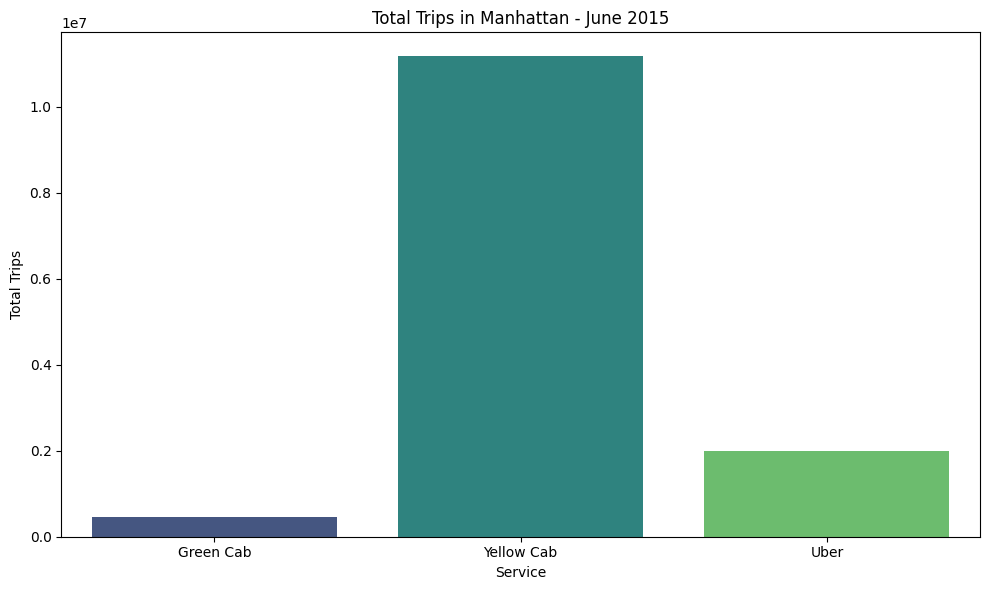

In [12]:
# Visualize the total number of trips for each service in Manhattan
plt.figure(figsize=(10,6))
sns.barplot(data=total_trips, x='Service', y='Total Trips', palette='viridis')
plt.title('Total Trips in Manhattan - June 2015')
plt.tight_layout()
plt.show()

In [13]:
# Calculate the average number of daily trips for each service in Manhattan
average_daily_trips_green_cab = green_cab_manhattan.groupby('Date')['VendorID'].size().mean()

average_daily_trips_yellow_cab = yellow_cab_manhattan.groupby('Date')['VendorID'].size().mean()

average_daily_trips_uber = uber_manhattan.groupby('Date')['Affiliated_base_num'].size().mean()

In [14]:
average_daily_trips = pd.DataFrame({'Service': ['Green Cab', 'Yellow Cab', 'Uber'],
                                    'Average Daily Trips': [round(average_daily_trips_green_cab, 2), round(average_daily_trips_yellow_cab, 2), round(average_daily_trips_uber, 2)]})
average_daily_trips

,Service,Average Daily Trips
0,Green Cab,15318.20
1,Yellow Cab,372285.80
2,Uber,66531.27


<ipython-input-15-e6084ba2ffd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_daily_trips, x='Service', y='Average Daily Trips', palette='viridis')


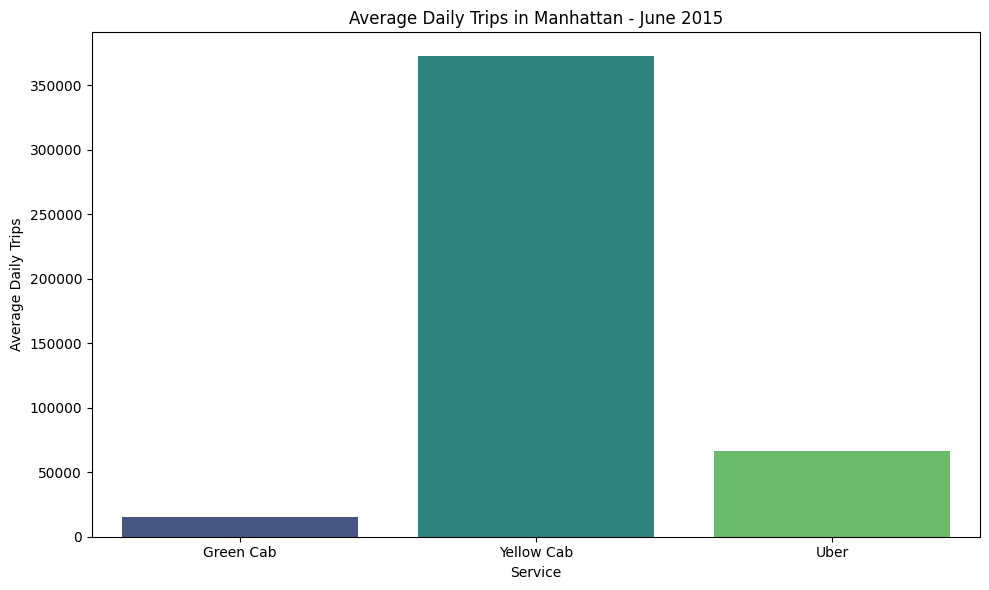

In [15]:
# Visualize the average number of daily trips for each service in Manhattan
plt.figure(figsize=(10,6))
sns.barplot(data=average_daily_trips, x='Service', y='Average Daily Trips', palette='viridis')
plt.title('Average Daily Trips in Manhattan - June 2015')
plt.tight_layout()
plt.show()

In [16]:
# Calculate the total number of trips for each day of the week for each service in Manhattan
def trips_per_day_of_week(df, service_name):
    trips = df.groupby('DayOfWeek').apply(len).reset_index(name='TripCount')
    trips['Service'] = service_name
    return trips

In [17]:
green_cab_dow = trips_per_day_of_week(green_cab_manhattan, 'Green Cab')
yellow_cab_dow = trips_per_day_of_week(yellow_cab_manhattan, 'Yellow Cab')
uber_dow = trips_per_day_of_week(uber_manhattan, 'Uber')

dow_data = pd.concat([green_cab_dow, yellow_cab_dow, uber_dow])
dow_data

<ipython-input-16-4d1457f80361>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trips = df.groupby('DayOfWeek').apply(len).reset_index(name='TripCount')
<ipython-input-16-4d1457f80361>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trips = df.groupby('DayOfWeek').apply(len).reset_index(name='TripCount')
<ipython-input-16-4d1457f80361>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping

,DayOfWeek,TripCount,Service
0,Friday,69637,Green Cab
1,Monday,70907,Green Cab
2,Saturday,66496,Green Cab
3,Sunday,55305,Green Cab
4,Thursday,64199,Green Cab
5,Tuesday,72682,Green Cab
6,Wednesday,60320,Green Cab
0,Friday,1601713,Yellow Cab
1,Monday,1706223,Yellow Cab
2,Saturday,1582708,Yellow Cab


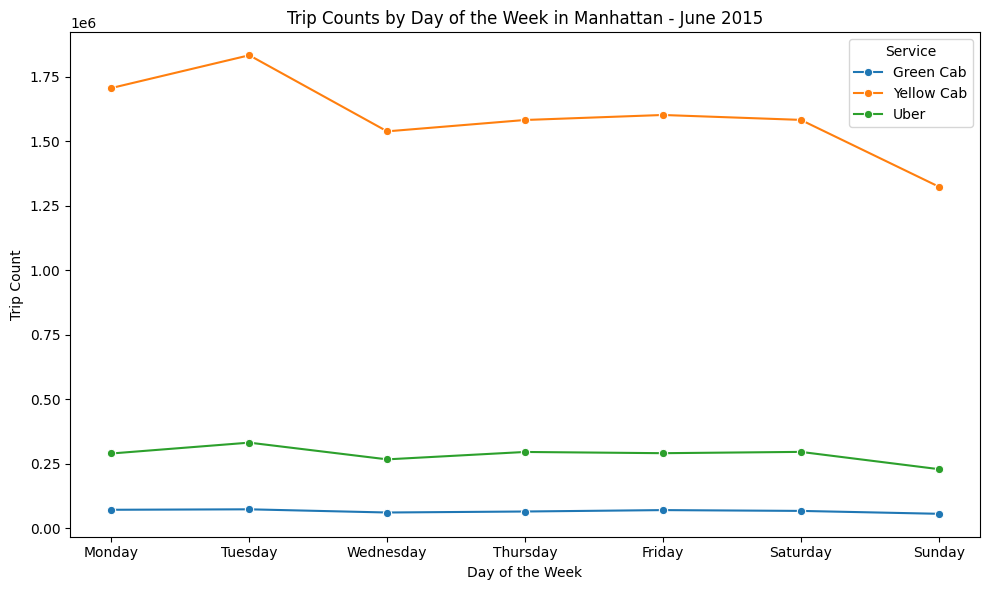

In [18]:
# Visualize trip counts over the days of the week for each service
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_data['DayOfWeek'] = pd.Categorical(dow_data['DayOfWeek'], categories=dow_order, ordered=True)

plt.figure(figsize=(10,6))
sns.lineplot(data=dow_data, x='DayOfWeek', y='TripCount', hue='Service', marker='o')
plt.title('Trip Counts by Day of the Week in Manhattan - June 2015')
plt.xlabel('Day of the Week')
plt.ylabel('Trip Count')
plt.tight_layout()
plt.show()

#### **Total and Average Trips**
- **Yellow Cabs** dominate trip volume in Manhattan for June 2015, with over **11 million** total trips and an average of **~372,000 daily trips**.
- **Uber** is second, with about **2 million total trips** and **~66,000 daily trips**, indicating strong market penetration but still significantly trailing Yellow Cabs.
- **Green Cabs** show the least activity in Manhattan, likely due to their primary operation in outer boroughs, with only **~460,000 trips** and **~15,000 daily trips**.

#### **Day-of-Week Patterns**
- **Uber trips peak on Tuesdays**, with a gradual decline toward Sunday. This may reflect commuting or business-related travel early in the week.
- **Yellow Cabs** follow a similar trend, peaking on **Tuesdays** and dropping off on **Sundays**, though they maintain consistently high volume throughout.
- **Green Cabs** exhibit more modest fluctuations, but their trend aligns loosely with the others, also peaking mid-week and dipping on Sundays.

#### **Observations**
- Yellow Cab dominance suggests that **traditional taxis were still the primary mode of transport in Manhattan in 2015**, despite Uber’s rising popularity.
- **Weekday demand—especially Tuesday—outpaces weekend use**, possibly highlighting commuter-heavy traffic patterns.
- **Sunday drop-offs** are noticeable across all services, indicating reduced rider activity.

# Regression Analysis of the Impact of Uber Rides on Taxi Rides

In [19]:
# Preprocessing
num_rides_rainfall_June_2015 = pd.read_csv(os.path.join(data_path, 'demand_elasticity_data_NYC_June_2015.csv'))

num_rides_rainfall_June_2015['Date'] = pd.to_datetime(num_rides_rainfall_June_2015['Date'])

num_rides_rainfall_June_2015.set_index(['Date', 'Hour', 'LocationID'], inplace=True)

num_rides_rainfall_June_2015.sort_index(inplace=True)

In [20]:
num_rides_rainfall_June_2015

Num_Uber_Rides  Num_Yellow_Cab_Rides  \
Date       Hour LocationID                                         
2015-06-01 0    7                      8.0                  48.0   
                17                    17.0                  14.0   
                18                     2.0                   2.0   
                25                     7.0                  11.0   
                28                     1.0                   3.0   
...                                    ...                   ...   
2015-06-30 22   255                   88.0                  87.0   
                256                   67.0                  59.0   
                257                    4.0                   1.0   
                260                    8.0                   4.0   
                263                   36.0                 317.0   

                            Num_Green_Cab_Rides  precipitation  
Date       Hour LocationID                                      
2015-06-01 0    7                          92.0      69.415139  
                17                         32.0      47.720132  
                18                          2.0      41.290715  
                25                         35.0      19.821492  
                28                          1.0      61.365975  
...                                         ...            ...  
2015-06-30 22   255                       133.0      50.401150  
                256                        58.0      51.586199  
                257                         2.0      47.245371  
                260                        42.0      72.664295  
                263                         2.0      35.342761  

[47218 rows x 4 columns]

In [21]:
num_rides_rainfall_June_2015.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 47218 entries, (Timestamp('2015-06-01 00:00:00'), np.int64(0), np.int64(7)) to (Timestamp('2015-06-30 00:00:00'), np.int64(22), np.int64(263))
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num_Uber_Rides        47218 non-null  float64
 1   Num_Yellow_Cab_Rides  47218 non-null  float64
 2   Num_Green_Cab_Rides   47218 non-null  float64
 3   precipitation         47218 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [22]:
# Check missing values
num_rides_rainfall_June_2015.isna().sum()

,0
Num_Uber_Rides,0
Num_Yellow_Cab_Rides,0
Num_Green_Cab_Rides,0
precipitation,0


In [23]:
# Compute daily totals for rides and rainfall for each location
daily_num_rides_rainfall_June_2015 = num_rides_rainfall_June_2015.groupby(['Date', 'LocationID']).sum()
daily_num_rides_rainfall_June_2015

Num_Uber_Rides  Num_Yellow_Cab_Rides  \
Date       LocationID                                         
2015-06-01 7                    486.0                 716.0   
           10                    12.0                  17.0   
           14                    58.0                   5.0   
           17                   473.0                 144.0   
           18                    11.0                   8.0   
...                               ...                   ...   
2015-06-30 257                   18.0                   4.0   
           258                    5.0                   1.0   
           260                  116.0                 196.0   
           262                   76.0                 440.0   
           263                  467.0                4068.0   

                       Num_Green_Cab_Rides  precipitation  
Date       LocationID                                      
2015-06-01 7                        2433.0    1083.416301  
           10                          4.0     171.977497  
           14                         15.0     202.786810  
           17                        782.0    1115.059663  
           18                         54.0     285.176106  
...                                    ...            ...  
2015-06-30 257                         9.0     170.285133  
           258                         1.0      41.636301  
           260                       707.0     933.530096  
           262                         1.0      70.311322  
           263                        23.0     575.821695  

[4130 rows x 4 columns]

In [24]:
import statsmodels.api as sm

In [25]:
# Not controlling for precipitation
reg = sm.OLS(daily_num_rides_rainfall_June_2015[['Num_Yellow_Cab_Rides', 'Num_Green_Cab_Rides']].sum(axis=1) ,
             sm.add_constant(daily_num_rides_rainfall_June_2015['Num_Uber_Rides']))

results = reg.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     4565.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        07:41:14   Log-Likelihood:                -34945.
No. Observations:                4130   AIC:                         6.989e+04
Df Residuals:                    4128   BIC:                         6.991e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.8646     20.892      1.

In [26]:
# Controlling for precipitation
reg = sm.OLS(daily_num_rides_rainfall_June_2015[['Num_Yellow_Cab_Rides', 'Num_Green_Cab_Rides']].sum(axis=1) ,
             sm.add_constant(daily_num_rides_rainfall_June_2015[['Num_Uber_Rides', 'precipitation']]))

results = reg.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     2285.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        07:41:14   Log-Likelihood:                -34943.
No. Observations:                4130   AIC:                         6.989e+04
Df Residuals:                    4127   BIC:                         6.991e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.9654     27.661     -0.

**Model 1** (without controlling for precipitation) estimates that each additional Uber ride is associated with a 4.07 increase in combined Yellow + Green Cab rides. This is highly significant (t = 67.56, p < 0.001). R² = 0.525, meaning about 52.5% of the variation in taxi rides is explained by Uber rides alone.

**Model 2** includes precipitation as a second predictor. The coefficient on Uber rides drops slightly to 3.99, still significant (p < 0.001). Precipitation’s coefficient = 0.126, with p ≈ 0.062, which is marginally insignificant at the 5% level. The R² only increases from 0.525 to 0.526, suggesting that precipitation adds little explanatory power.

To summarize, **Uber demand is a strong predictor of taxi demand**, largely unaffected by weather (at least by precipitation alone).